In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

In [162]:
POI_FILENAME = "../data/poi-paris.pkl"
parismap = mpimg.imread('../data/paris-48.806-2.23--48.916-2.48.jpg')
## coordonnees GPS de la carte
xmin, xmax = 2.23, 2.48  # coord_x min et max
ymin, ymax = 48.806, 48.916  # coord_y min et max
coords = [xmin, xmax, ymin, ymax]
coords = np.array([xmin, xmax, ymin, ymax])

In [163]:
class Density(object):
    def fit(self,data):
        pass
    def predict(self,data):
        pass
    def score(self,data):
        #A compléter : retourne la log-vraisemblance
        y = self.predict(data) + 10e-10
        return np.sum(np.log(y))


In [165]:
class Histogramme(Density):
    def __init__(self,steps=10):
        Density.__init__(self)
        self.steps = steps
    
    def fit(self,x):

        self.histogram = np.array(np.histogramdd(x, bins=self.steps))
        
        self.volume = ((xmax-xmin)*(ymax-ymin))/(self.steps**2)
        self.histogram[0]/=(len(x)*self.volume)
    
    def to_bin(self,x):
        l = ((x - coords[[0,2]])/(coords[[1,3]] - coords[[0,2]])
        l *= self.steps
        return np.intc(np.floor(l))
        
    
    def predict(self,x):
        coord = self.to_bin(x)
        #print(coord)
        #print(x)
        return self.histogram[0][coord[:,0],coord[:,1]]


SyntaxError: invalid syntax (<ipython-input-165-dec619e19b57>, line 15)

In [145]:
class KernelDensity(Density):
    def __init__(self,kernel=None,sigma=0.1):
        Density.__init__(self)
        self.kernel = kernel
        self.sigma = sigma
    def fit(self,x):
        self.x = x
    def predict(self,data):
        #A compléter : retourne la densité associée à chaque point de data
        def f(d): 
            return np.sum(self.kernel((d - self.x)/self.sigma))
        
        r = 1/ (len(self.x)*(self.sigma**len(data[0])))
        return r*np.array(list(map(f, data)))
        
 
def kernel_uniform(data):
    res = np.all(abs(data) <= 1 / 2, 1)
    return np.multiply(res,1)
def kernel_gaussian(data):
    return (2*np.pi)**(-len(data[0])/2)*np.exp(-0.5*np.sum(data**2,axis=1))
    

In [146]:
def get_density2D(f,data,steps=100):
    """ Calcule la densité en chaque case d'une grille steps x steps dont les bornes sont calculées à partir du min/max de data. Renvoie la grille estimée et la discrétisation sur chaque axe.
    """
    xmin, xmax = data[:,0].min(), data[:,0].max()
    ymin, ymax = data[:,1].min(), data[:,1].max()
    xlin,ylin = np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps)
    xx, yy = np.meshgrid(xlin,ylin)
    grid = np.c_[xx.ravel(), yy.ravel()]
    res = f.predict(grid).reshape(steps, steps)
    return res, xlin, ylin

In [147]:
def show_density(f, data, steps=100, log=False):
    """ Dessine la densité f et ses courbes de niveau sur une grille 2D calculée à partir de data, avec un pas de discrétisation de steps. Le paramètre log permet d'afficher la log densité plutôt que la densité brute
    """
    res, xlin, ylin = get_density2D(f, data, steps)
    xx, yy = np.meshgrid(xlin, ylin)
    plt.figure()
    show_img()
    if log:
        res = np.log(res+1e-10)
    plt.scatter(data[:, 0], data[:, 1], alpha=0.8, s=3)
    show_img(res)
    plt.colorbar()
    plt.contour(xx, yy, res, 20)

In [148]:
def show_img(img=parismap):
    """ Affiche une matrice ou une image selon les coordonnées de la carte de Paris.
    """
    origin = "lower" if len(img.shape) == 2 else "upper"
    alpha = 0.3 if len(img.shape) == 2 else 1.
    plt.imshow(img, extent=coords, aspect=1.5, origin=origin, alpha=alpha)
    ## extent pour controler l'echelle du plan

In [149]:
def load_poi(typepoi,fn=POI_FILENAME):
    """ Dictionaire POI, clé : type de POI, valeur : dictionnaire des POIs de ce type : (id_POI, [coordonnées, note, nom, type, prix])
    
    Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, 
    clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
    """
    poidata = pickle.load(open(fn, "rb"))
    data = np.array([[v[1][0][1],v[1][0][0]] for v in sorted(poidata[typepoi].items())])
    note = np.array([v[1][1] for v in sorted(poidata[typepoi].items())])
    return data,note

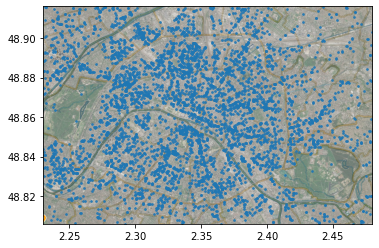

In [150]:
plt.ion()
# Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
# La fonction charge la localisation des POIs dans geo_mat et leur note.
geo_mat, notes = load_poi("bar")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)

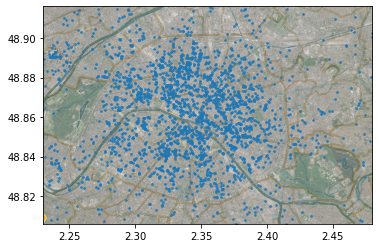

In [151]:
geo_mat, notes = load_poi("cafe")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)



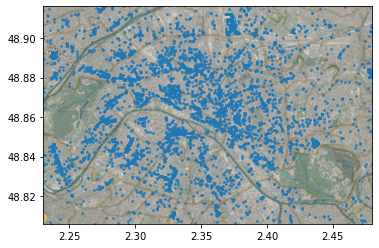

In [152]:
geo_mat, notes = load_poi("clothing_store")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)

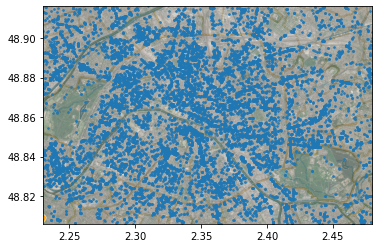

In [169]:
geo_mat1, _ = load_poi("bar")
geo_mat2, _ = load_poi("restaurant")
geo_mat = np.concatenate((geo_mat1,geo_mat2))


geo_night, _ = load_poi("night_club")

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)


<ipython-input-144-628a917f22c4>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.histogram = np.array(np.histogramdd(x, bins=self.steps))


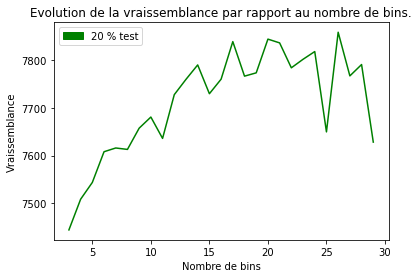

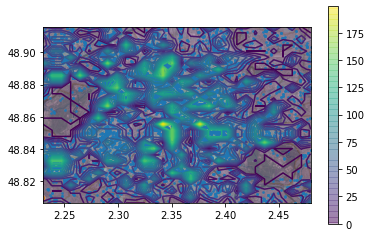

In [175]:
start = 3
end = 30
pas = 1
plt.close()
X_train, X_test = train_test_split(geo_mat, test_size=0.2, random_state=None)
test= []
patchs = [mpatches.Patch(color="green", label='20 % test')]
for step in range(start,end,pas):    

    h = Histogramme(step)
    h.fit(X_train)
    score = h.score(X_test)
    test += [score]
            
plt.legend(handles=patchs)
plt.title("Evolution de la vraissemblance par rapport au nombre de bins.")
plt.ylabel("Vraissemblance")
plt.xlabel("Nombre de bins")
plt.plot(range(start,end,pas),test,color="green")
plt.show()


res, xlin, ylin = get_density2D(h, geo_mat, pas)
show_density(h, geo_mat, steps, log=False)


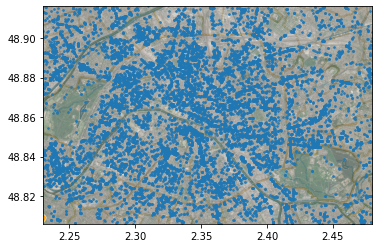

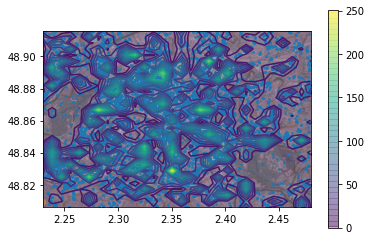

In [173]:
sigma = 0.001

steps = 30

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)

h = KernelDensity(kernel=kernel_gaussian,sigma=sigma)
h.fit(geo_mat)


res, xlin, ylin = get_density2D(h, geo_mat, steps)
show_density(h, geo_mat, steps, log=False)

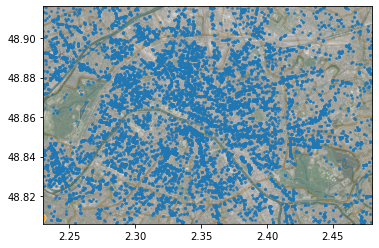

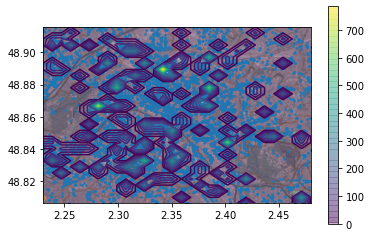

In [174]:
geo_mat1, notes1 = load_poi("bar")
geo_mat2, notes2 = load_poi("restaurant")
geo_mat = np.concatenate((geo_mat1,geo_mat2))

notes = np.concatenate((notes1,notes2))

geo_mat = geo_mat[notes>=0]
notes = notes[notes>=0]

geo_night, notes = load_poi("night_club")

steps = 30
sigma = 0.001

# Affiche la carte de Paris
show_img()
# Affiche les POIs
plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)


h = KernelDensity(kernel = kernel_uniform, sigma=sigma)
h.fit(geo_mat)

res, xlin, ylin = get_density2D(h, geo_mat, steps)
show_density(h, geo_mat, steps, log=False)

In [158]:
class Nadaraya(Density):
    def __init__(self,kernel = None,sigma = 0):
        Density.__init__(self)
        self.kernel = kernel
        self.sigma = sigma
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def score(self,x,y):
        return np.sum((self.predict(x) - y)**2)
    
    def predict(self,data):
        
        def f(d):
            tmp = np.sum(self.kernel((d -self.x)/self.sigma))
            if tmp == 0:
                return -1
            return np.sum(self.y*self.kernel((d -self.x)/self.sigma)/tmp)
                            
        return np.array(list(map(f, data)))

    
def kernel_uniform(data):
    res = np.all(abs(data) <= 1 / 2, 1)
    return np.multiply(res,1)
def kernel_gaussian(data):
    return (2*np.pi)**(-len(data[0])/2)*np.exp(-0.5*np.sum(data**2,axis=1))
    

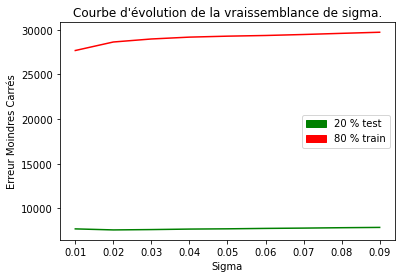

In [166]:
geo_mat1, notes1 = load_poi("bar")
geo_mat2, notes2 = load_poi("restaurant")
geo_mat = np.concatenate((geo_mat1,geo_mat2))
notes = np.concatenate((notes1,notes2))

geo_night, notes_night = load_poi("night_club")

steps = 20
sigma = 0.001
h = Nadaraya(kernel=kernel_gaussian,sigma=sigma)
h.fit(geo_mat,notes)
h.predict(geo_mat)

#show_density(kde, geo_mat, steps, log=True)

start =0.01
end = 0.1
pas = 0.01

plt.close()
X_train, X_test, notes_train, notes_test = train_test_split(geo_mat,notes, test_size=0.2, random_state=42)

test, train = [], []
patchs = [mpatches.Patch(color="green", label='20 % test'),mpatches.Patch(color="red", label='80 % train')]
for sigma in np.arange(start,end,pas):    

    d = Nadaraya(kernel_uniform,sigma)
    d.fit(X_train, notes_train)
    score = d.score(X_test,notes_test)
    test += [score]
    score = d.score(X_train,notes_train)
    train += [score]
          
plt.legend(handles=patchs)
plt.title("Courbe d'évolution de la vraissemblance de sigma.")
plt.ylabel("Erreur Moindres Carrés")
plt.xlabel("Sigma")
plt.plot(np.arange(start,end,pas),test,color="green")
plt.plot(np.arange(start,end,pas),train,color="red")
plt.show()
